# Object Detection Assessment Project Exercise

## Russian License Plate Blurring

Welcome to your object detection project! Your goal will be to use Haar Cascades to blur license plates detected in an image!

Russians are famous for having some of the most entertaining DashCam footage on the internet (I encourage you to Google Search "Russian DashCam"). Unfortunately a lot of the footage contains license plates, perhaps we could help out and create a license plat blurring tool?

OpenCV comes with a Russian license plate detector .xml file that we can use like we used the face detection files (unfortunately, it does not come with license detectors for other countries!)

----


#### 3 Ways to Approach this project:
* Just go for it! Use the image under the DATA folder called car_plate.jpg and create a function that will blur the image of its license plate. Check out the Haar Cascades folder for the correct pre-trained .xml file to use.
* Use this notebook! Here we offer a guide of what main steps you should take to complete the project.
* Jump to the solutions notebook and video to treat this entire project as code-along project where you can code along with us.

## Project Guide

Follow and complete the tasks below to finish the project!

**TASK: Import the usual libraries you think you'll need.**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**TASK: Read in the car_plate.jpg file from the DATA folder.**

In [3]:
img = cv2.cvtColor(cv2.imread('../DATA/car_plate.jpg'), cv2.COLOR_BGR2RGB)

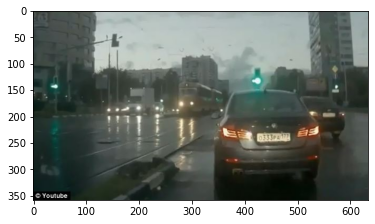

In [4]:
plt.imshow(img)

**TASK: Create a function that displays the image in a larger scale and correct coloring for matplotlib.**

In [5]:
def display(img):
    fig = plt.figure(figsize = (12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(img)

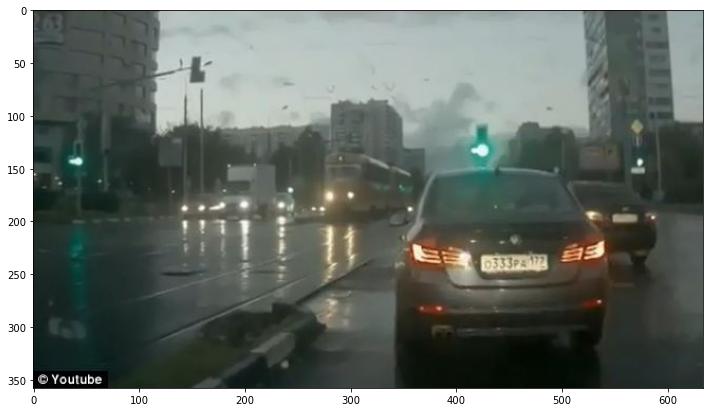

In [6]:
display(img)

**TASK: Load the haarcascade_russian_plate_number.xml file.**

In [7]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

**TASK: Create a function that takes in an image and draws a rectangle around what it detects to be a license plate. Keep in mind we're just drawing a rectangle around it for now, later on we'll adjust this function to blur. You may want to play with the scaleFactor and minNeighbor numbers to get good results.**

In [8]:
def detect_plate(img):
    img_copy = img.copy()
    
    number = cascade.detectMultiScale(img_copy)
    
    for (x, y, w, h) in number:
        cv2.rectangle(img_copy, [x, y], [x + w, y + h], (255, 255, 255), 10)
    
    return img_copy

In [9]:
result = detect_plate(img)

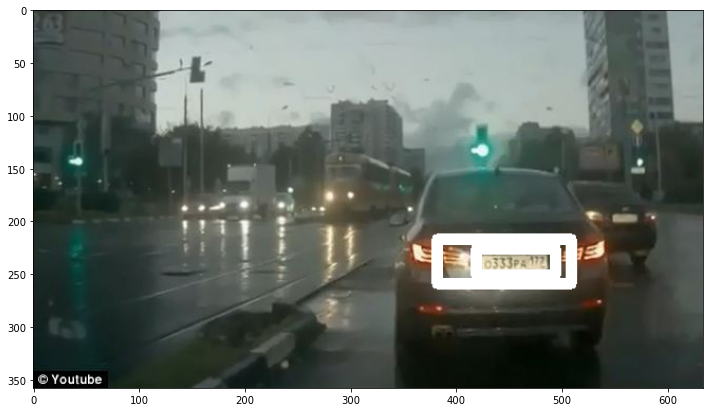

In [10]:
display(result)

**FINAL TASK: Edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps you might want to take:**

1. The hardest part is converting the (x,y,w,h) information into the dimension values you need to grab an ROI (somethign we covered in the lecture 01-Blending-and-Pasting-Images. It's simply [Numpy Slicing](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python), you just need to convert the information about the top left corner of the rectangle and width and height, into indexing position values.
2. Once you've grabbed the ROI using the (x,y,w,h) values returned, you'll want to blur that ROI. You can use cv2.medianBlur for this.
3. Now that you have a blurred version of the ROI (the license plate) you will want to paste this blurred image back on to the original image at the same original location. Simply using Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

In [32]:
def detect_and_blur_plate(img):
    img_copy = img.copy()
    
    number = cascade.detectMultiScale(img_copy, scaleFactor = 1.7, minNeighbors = 4)
    
#     img_gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
#     thresh, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.ADAPTIVE_THRESH_MEAN_C)

#     filt = lambda x: max(abs(x[0] - x[1]), abs(x[1] - x[2]), abs(x[0] - x[2]))
    
    dev = np.sqrt(np.var(img_copy, axis = 2))
    
    for (x, y, w, h) in number:
        gray = cv2.cvtColor(img[y:y+h, x:x+w], cv2.COLOR_RGB2GRAY)
        med_val = np.median(gray)
        edges = cv2.Canny(gray, threshold1 = 0.7 * med_val, threshold2 = 1.3 * med_val)
        plt.imshow(edges)
#         print(proceeded[y:y+h, x:x+w].mean())
#         if(dev[y:y+h, x:x+w].mean() > 30 or edges.mean() < 40 or edges.mean() > 100):# or img[y:y+h, x:x+w].mean() < img[y-10:y+h+10, x-10:x+w+10].mean()):
#             continue
        img_copy2 = img_copy.copy()
        img_copy2 = cv2.blur(img_copy2, [50, 50], cv2.BORDER_DEFAULT)
        img_copy[y:y+h, x:x+w] = img_copy2[y:y+h, x:x+w]
    
    return img_copy
    

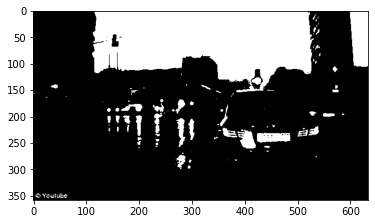

In [33]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh, img_filtered = cv2.threshold(img_gray.astype(np.float32), 127, 255, cv2.THRESH_BINARY)
plt.imshow(img_filtered, cmap = 'gray')
result = detect_and_blur_plate(img)
# cv2.blur(result, [50, 50], cv2.BORDER_DEFAULT)

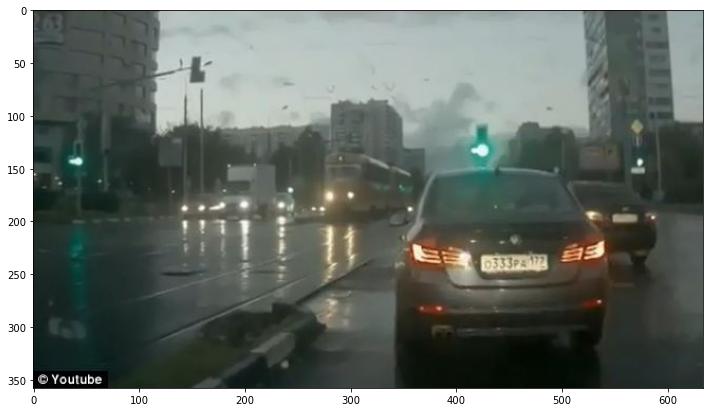

In [34]:
display(result)

# Great Job!

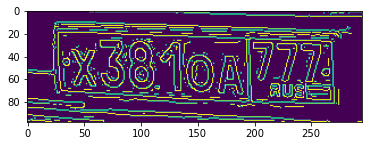

In [36]:
cap = cv2.VideoCapture('../DATA/jeep.mp4')

for i in range(10 * 25):
    rep, frame = cap.read()

while True:
    rep, frame = cap.read()
    
    if type(frame) == 'NoneType':
        break
        
#     filt = lambda x: max(abs(x[0] - x[1]), abs(x[1] - x[2]), abs(x[0] - x[2]))
    
#     proceeded = np.array([[filt(x) for x in a] for a in img])
    
#     print(proceeded)

    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    med_val = np.median(gray)

    edges = cv2.Canny(frame, threshold1 = 0.7 * med_val, threshold2 = 1.3 * med_val)
    
    cv2.imshow("Window", detect_and_blur_plate(frame))
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()